In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv(r"E:\nlp\SMS Spam classifier\data\SMSSpamCollection.txt",sep="\t",names=["Target","SMS"])
df

,Target,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
df.isna().sum()

Target    0
SMS       0
dtype: int64

In [3]:
x = df["SMS"]

In [4]:
y = df["Target"]
y

# Data Cleaning

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Target, Length: 5572, dtype: object

In [5]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wl=WordNetLemmatizer()

In [6]:
sms = []
for i in range(0,len(x)):
    new = re.sub('[^a-zA-Z]', ' ', x[i])
    new = new.lower()
    new = new.split()
    new = [ps.stem(word) for word in new if not word in stopwords.words('english')]
    new = " ".join(new)
    sms.append(new)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=2500)
X = tf.fit_transform(x).toarray()

In [8]:
import pickle
pickle_out = open("trans.pkl","wb")
pickle.dump(tf, pickle_out)
pickle_out.close()

In [9]:
y = pd.get_dummies(y,drop_first=True)
y = y["spam"]

In [10]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8

## Split train test

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4457, 2500)
(1115, 2500)
(4457,)
(1115,)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib as plt
import seaborn as sns

In [15]:
def prediction(x_test,y_test,model,algo):        
        print(f"Predictions for {algo} Algorithem")
        print("Test Results: ")
        print("================")
        pre_t = model.predict(x_test)
        print("        Accuracy Score    : {:.2f} %".format((metrics.accuracy_score(y_test,pre_t))*100))
        print("")        
        print("        F1 Score          : {:.4f} ".format((metrics.f1_score(y_test,pre_t,average="macro"))))
        print("")        
        print("        Precision         : {:.4f} ".format((metrics.precision_score(y_test,pre_t,average="macro"))))
        print("")
        print("        Recall            : {:.4f} ".format((metrics.recall_score(y_test,pre_t,average="macro"))))
        print(     "Classification Report  :  ")
        print(f" {metrics.classification_report(y_test,pre_t)}")        

In [16]:
colorm = ["YlOrRd","BuPu","PuBu","YlGn","RdBu"]
import random as ran
def con_mat(x_test,y_test,model,algo):
    print(f"Confusion matrix for {algo} Algorithem")
    pre_t = model.predict(x_test)
    cm_lr = metrics.confusion_matrix(y_test,pre_t)
    sns.heatmap(cm_lr,cmap=ran.choice(colorm),annot=True,cbar=True,annot_kws={"size": 20})

In [17]:
from sklearn.naive_bayes import MultinomialNB
mnn=MultinomialNB()
model = mnn.fit(x_train,y_train)

In [19]:
algo = "Multinomial Naive Bayes"
prediction(x_train,y_train,model,algo)

Predictions for Multinomial Naive Bayes Algorithem
Test Results: 
        Accuracy Score    : 98.27 %

        F1 Score          : 0.9600 

        Precision         : 0.9902 

        Recall            : 0.9344 
Classification Report  :  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3870
           1       1.00      0.87      0.93       587

    accuracy                           0.98      4457
   macro avg       0.99      0.93      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [20]:
algo = "Multinomial Naive Bayes"
prediction(x_test,y_test,model,algo)

Predictions for Multinomial Naive Bayes Algorithem
Test Results: 
        Accuracy Score    : 98.21 %

        F1 Score          : 0.9615 

        Precision         : 0.9897 

        Recall            : 0.9375 
Classification Report  :  
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Confusion matrix for Multinomial Naive Bayes Algorithem


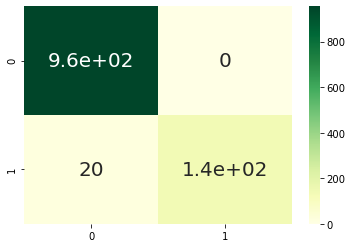

In [21]:
con_mat(x_test,y_test,mnn,algo)

In [22]:
import pickle
pickle_out = open("spamfinder.pkl","wb")
pickle.dump(mnn, pickle_out)
pickle_out.close()

In [23]:
tf=pickle.load(open('trans.pkl', 'rb'))
tf

TfidfVectorizer(max_features=2500)

In [26]:
df[df["Target"]=="spam"]["SMS"][11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [24]:
message = "SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"
new = [message]    
word = tf.transform(new).toarray()
word

array([[0.        , 0.23161635, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
mnn.predict(word)

array([1], dtype=uint8)